**Rationale** This assignment will help you practice running and interpreting basic regressions analysis.

**[Datasets](https://drive.google.com/drive/folders/1LJ38ctVX62ggGGygJDLlLG2V6jZ4BNml?usp=sharing)**
1. [Safegraph Temple Visitor Sample](https://drive.google.com/file/d/1u_sDxFp9fja-_cop4yzIAJ_hX2-fplWN/view?usp=sharing) 
1. [Avocado Prices](https://drive.google.com/file/d/1QJ_dyyBFkHhC6VkzVvdAFa385mtqtntM/view?usp=sharing)

**Data description** This dataset includes SafeGraph's sampled foot traffic volume for Temple University between 1-1-2019 and 5-31-2020. Safegraph collects the foot traffic data from a network of phone apps. You can view the `visits` data as the number of SafeGraph tracked devices to visit Temple University. This dataset is merged with Philadelphia's weather data. 


# 1. Run and interpret a simple linear regression (5 points)...
...to figure out the relationship between daily average temperateure as measured in degrees fahrenheit, `"temp"`, and people on campus `"visits"` for the Fall 2019 semester (limit data to M-F 8-26 - 11-24-2019, inclusive).

In your answer: 
1. First, look at data. What is the average number of SafeGraph visitors to Temple University during the teaching days of the Fall 2019 semester? Roughly what percent of the Temple student population is this?
1. Specify (write out the regression equation), run, and interpret a regression that documents the relationship between temperature and foot traffic (visits) on campus.
    1. Do more students visit campus (and presumably go to class) when the weather is warmer or colder?
    1. Besides students not wanting to go to class when the temperature is not to their liking, what else might cause the observed relationship between visits and temperature?

In [ ]:
# imports here
import os, pandas as pd, matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.formula import api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('drive')

Mounted at drive


In [ ]:
# list directory containing the data
fpath = 'drive/MyDrive/Datasets_A6/' # change this to your data folder
os.listdir(fpath)

['temple_traffic.csv', 'avocado.csv']

In [ ]:
# read in the dataset
temple = pd.read_csv(fpath + 'temple_traffic.csv', index_col = 0)

In [ ]:
#Displaying a few rows to get better sense of data

temple.head()

,safegraph_place_id,date,visits,stn,wban,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,visib,count_visib,wdsp,count_wdsp,mxspd,gust,maxtemp,flag_max,mintemp,flag_min,prcp,flag_prcp,sndp,frshtt
0,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-02,65,997286.0,99999.0,45.8,24.0,NaN,0.0,1016.8,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,63.3,*,34.7,*,0.0,I,NaN,0.0
1,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-03,68,997286.0,99999.0,53.0,24.0,NaN,0.0,1006.3,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,59.9,*,45.9,*,0.0,I,NaN,0.0
2,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-04,71,997286.0,99999.0,51.4,24.0,NaN,0.0,1006.3,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,58.6,*,45.1,*,0.0,I,NaN,0.0
3,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-05,70,997286.0,99999.0,49.2,24.0,NaN,0.0,1017.0,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,55.8,*,41.7,*,0.0,I,NaN,0.0
4,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-06,57,997286.0,99999.0,41.7,24.0,NaN,0.0,1013.1,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,49.1,*,37.2,*,0.0,I,NaN,0.0


In [ ]:
# convert the date column to pandas datetime using pd.to_datetime(...)
# if you've fogotten, look through notes from module 3

temple['date'] = pd.to_datetime(temple['date'])

In [ ]:
# create a new column called 'dow' (for day of week) using temple.date.dt.weekday
# note that Monday through Sunday corresponds to 0 through 6
temple['dow'] = temple.date.dt.weekday



In [ ]:
# Having look if 'dow' is added or not? 
temple.head()

,safegraph_place_id,date,visits,stn,wban,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,visib,count_visib,wdsp,count_wdsp,mxspd,gust,maxtemp,flag_max,mintemp,flag_min,prcp,flag_prcp,sndp,frshtt,dow
0,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-02,65,997286.0,99999.0,45.8,24.0,NaN,0.0,1016.8,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,63.3,*,34.7,*,0.0,I,NaN,0.0,0
1,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-03,68,997286.0,99999.0,53.0,24.0,NaN,0.0,1006.3,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,59.9,*,45.9,*,0.0,I,NaN,0.0,1
2,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-04,71,997286.0,99999.0,51.4,24.0,NaN,0.0,1006.3,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,58.6,*,45.1,*,0.0,I,NaN,0.0,2
3,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-05,70,997286.0,99999.0,49.2,24.0,NaN,0.0,1017.0,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,55.8,*,41.7,*,0.0,I,NaN,0.0,3
4,sg:00579e722c8e48178ef0c66a7c91f92c,2020-03-06,57,997286.0,99999.0,41.7,24.0,NaN,0.0,1013.1,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,49.1,*,37.2,*,0.0,I,NaN,0.0,4


In [ ]:
# select only the rows where the date lies between 2019/8/26 and 2019/11/24 (inclusive) 
# and correspond to a regular school date (e.g. are M-F)
# call the reuslting dataframe F2019
# remember you can select rows using df.loc[conditions]
# If you forgot how to do this, look at the notes and in class exercise from module 3
F2019 = temple[(temple['date'] >= '2019/8/26') & (temple['date'] <= '2019/11/24') & (temple['dow'] <= 4)]


In [ ]:
#Making sure if operation is sucessfull
F2019.head()

,safegraph_place_id,date,visits,stn,wban,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,visib,count_visib,wdsp,count_wdsp,mxspd,gust,maxtemp,flag_max,mintemp,flag_min,prcp,flag_prcp,sndp,frshtt,dow
7,sg:00579e722c8e48178ef0c66a7c91f92c,2019-09-23,169,997286.0,99999.0,80.2,23.0,NaN,0.0,1012.9,23.0,NaN,0.0,NaN,0.0,0.0,23.0,NaN,NaN,90.7,*,70.9,*,0.0,I,NaN,0.0,0
8,sg:00579e722c8e48178ef0c66a7c91f92c,2019-09-24,182,997286.0,99999.0,75.3,24.0,NaN,0.0,1009.2,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,83.3,*,66.7,*,0.0,I,NaN,0.0,1
9,sg:00579e722c8e48178ef0c66a7c91f92c,2019-09-25,156,997286.0,99999.0,72.3,24.0,NaN,0.0,1011.7,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,81.0,*,61.7,*,0.0,I,NaN,0.0,2
10,sg:00579e722c8e48178ef0c66a7c91f92c,2019-09-26,168,997286.0,99999.0,72.1,24.0,NaN,0.0,1009.5,24.0,NaN,0.0,NaN,0.0,0.0,24.0,NaN,NaN,87.3,*,63.5,*,0.0,I,NaN,0.0,3
11,sg:00579e722c8e48178ef0c66a7c91f92c,2019-09-27,165,997286.0,99999.0,70.3,22.0,NaN,0.0,1017.1,22.0,NaN,0.0,NaN,0.0,0.0,22.0,NaN,NaN,79.3,*,63.7,*,0.0,I,NaN,0.0,4


In [ ]:
# find the maximum date of F2019, make sure that it is less than or equal to 2019/11/24
F2019_Max_Date = F2019[(F2019['date'] <= '2019/11/24')].max()

print(F2019_Max_Date['date'])



2019-11-22 00:00:00


In [ ]:
# find the minimum date of F2019, make sure that it is greater than or equal to 2019/8/26
F2019_Min_Date = F2019[(F2019['date'] >= '2019/8/26')].min()

print(F2019_Min_Date['date'])


2019-08-26 00:00:00


In [ ]:
# display the unique values of dow in F2019 (use the .unique() method on dow column)
# make sure there are only M-F (e.g. 0-4)
F2019['dow'].unique()


array([0, 1, 2, 3, 4])

In [ ]:
# compute the mean visits
F2019['visits'].mean()

137.73846153846154

In [ ]:
# look up the total number of temple students in 2019 and compute the percentage the above average represents
Students = F2019['stn'].mean()

Students

997286.0

In [ ]:
#Computing the average

VisitPercentOfStudent = (137.7/Students) * 100
VisitPercentOfStudent

0.01380747348303295

**Edit this cell**
The average number of visitors in the sample is **__137.73846153846154__**, this is approximately **____0.01380747348303295______**\% of the Temple student population.

**Edit this cell**

Before running a regression to document the relationship between temperature and the sampled visitors, answer the following.

The logical dependent variable should be **_______visits__________**, the logical indepdent (aka explanatory) variable should be **_______temp_________** because **_______temp_________** should cause changes in **_______visits_________** and not the other way around.


Consequently, the following regression equation describes the relationship between temperature and foot traffic (change the $x$ and $y$ to the approriate variable names):

$$
y = \beta_0 +\beta_1x + e 
$$


In [ ]:
# run the above regression using statsmodels
# call the resulting regression results object the variable "res"


res = smf.ols(formula="visits ~ temp", data=F2019).fit()

In [ ]:
# print the regression summary table (e.g. print(res.summary()))
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                 visits   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     55.33
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           3.43e-10
Time:                        19:17:40   Log-Likelihood:                -285.36
No. Observations:                  65   AIC:                             574.7
Df Residuals:                      63   BIC:                             579.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.8564     13.255      3.082      0.0

**Edit this cell**

The regression's R$^2$ is **_______0.468________**, this suggests that **______46.8_________**\% of the variation in **______visits________** is explained by **______Model_________**.

The intercept ($\beta_0$) is **________40.8564________**, this means that when **_____tmp_______** is 0 **(fill in appropriate units of measure)**, **_______visits_________** is on average **________40.8564_________**. This is statistically **(in)significant(choose one)**, meaning that it is different from **_______________** in the population.

The coefficient ($\beta_1$) for **_____tmp_________** is **_____1.5446__________**. This means that for every **________1 unit_________** increase in **_______tmp__________**, **__visit_________________** **increases** by **________1.5446 unit_____________**. This is statistically **significant**, meaning that it is not different from **______hypothesis__________** in the population. In other words, we cannot reject the null hypothesis that there is no effect of temperature on campus foot traffic.

# 2. Avocado price and demand (5 points) (multiple regression)

For this exercise, use our familiar avocado dataset.

For the following cities, run a multiple regression that investigates the relationship between demand and price while simultaneously accounting for the effect of regions.

Use only the conventional avocado data from the following cities:

```
cities = ['Philadelphia', 'NewYork', 'BaltimoreWashington', 'Boston', 'Chicago', 'SanFrancisco']
```


In [ ]:
# read in the dataset, call it avocado
avocado = pd.read_csv(fpath + 'avocado.csv', index_col = 0)
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# To get better sense of data

avocado['region'].unique()

avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
# select only the rows corresponding to the cities listed above
# call the resulting dataframe avocado (replace avocado with the result of this subset selection)
# use .isin(...) method (see notes from module 4 bar plot to find an example of this)
# also make sure to select only the data for the conventional avocado type

# creating a bool series from isin()
new = avocado["region"].isin(['Philadelphia', 'NewYork', 'BaltimoreWashington', 'Boston', 'Chicago', 'SanFrancisco']) & avocado["type"].isin(['conventional'])
  
# data with bool series
avocado = avocado[new]

avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
104,2015-12-27,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.0,conventional,2015,BaltimoreWashington
105,2015-12-20,1.11,642682.40,44741.37,434590.82,19112.14,144238.07,141751.91,2486.16,0.0,conventional,2015,BaltimoreWashington
106,2015-12-13,1.15,619509.33,44400.26,399851.59,24291.20,150966.28,149070.40,1895.88,0.0,conventional,2015,BaltimoreWashington
107,2015-12-06,1.04,649141.25,51129.29,453586.50,25760.49,118664.97,117112.77,1552.20,0.0,conventional,2015,BaltimoreWashington
108,2015-11-29,1.16,545800.05,41028.15,379156.09,20147.53,105468.28,103615.95,1852.33,0.0,conventional,2015,BaltimoreWashington


In [ ]:
# show the unique regions in the resulting dataframe 
# make sure we have only the ones we wanted to select from above

avocado['region'].unique()


array(['BaltimoreWashington', 'Boston', 'Chicago', 'NewYork',
       'Philadelphia', 'SanFrancisco'], dtype=object)

In [ ]:
# show the unique types in the resulting dataframe 
# make sure we have only conventional

avocado['type'].unique()

array(['conventional'], dtype=object)

**edit this cell**
To model the demand of avocaldos, we want to run the following regression:

$$
Demand = \beta_0 + \beta_1 Price +\beta_2 Boston +\beta_3Chicago +\beta_4NewYork + \beta_5 Philadelphia + \beta_6 SanFrancisco +e
$$

In this equation (given the cities we've selected for the dataset), $\beta_0$ represents the average demand in **____Boston________** when price is \$ $0$.



In [ ]:
# since statsmodels expects variable names to not have spaces
# use a list comprehension to replace  spaces with underscores
# make sure you understand how/why this works:
avocado.columns = [c.replace('Total Bags', 'Total_Bags') for c in avocado.columns]

In [ ]:
# take a look at the resulting dataframe
avocado.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total_Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
104,2015-12-27,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.0,conventional,2015,BaltimoreWashington
105,2015-12-20,1.11,642682.40,44741.37,434590.82,19112.14,144238.07,141751.91,2486.16,0.0,conventional,2015,BaltimoreWashington
106,2015-12-13,1.15,619509.33,44400.26,399851.59,24291.20,150966.28,149070.40,1895.88,0.0,conventional,2015,BaltimoreWashington
107,2015-12-06,1.04,649141.25,51129.29,453586.50,25760.49,118664.97,117112.77,1552.20,0.0,conventional,2015,BaltimoreWashington
108,2015-11-29,1.16,545800.05,41028.15,379156.09,20147.53,105468.28,103615.95,1852.33,0.0,conventional,2015,BaltimoreWashington


In [ ]:
# run the regression using statsmodels
# call the result object res
# for demand, use 'Total Bags'
res = smf.ols('Total_Bags ~AveragePrice + region', data=avocado).fit()


In [ ]:
# print the regression summary table
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Total_Bags   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     546.7
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          1.30e-312
Time:                        19:51:09   Log-Likelihood:                -12529.
No. Observations:                1014   AIC:                         2.507e+04
Df Residuals:                    1007   BIC:                         2.511e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.847e+05   1.05e+04     17.671      0.000    1.64e+05    2.05e+05
region[T.Boston]       -8.097e+04   6144.983    -13.177      0.000    -9.3e+04   -6.89e+04
region[T.Chicago]      -9.941e+04   6141.100    -16.188      0.000   -1.11e+05   -8.74e+04
region[T.NewYork]       1.843e+05   6152.184     29.961      0.000    1.72e+05    1.96e+05
region[T.Philadelphia]  -6.29e+04   6149.588    -10.229      0.000    -7.5e+04   -5.08e+04
region[T.SanFrancisco] -1.097e+05   6149.942    -17.839      0.000   -1.22e+05   -9.76e+04
AveragePrice            8121.8105   7073.444      1.148      0.251   -5758.568     2.2e+04
==============================================================================
Omnibus:                      586.949   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10971.908
Skew:                           2.262   Prob(JB):                         0.00
Kurtosis:                      18.467   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Edit this cell**
1. The R$^2$ is **_______0.765_________**, this means that **______7.65__________**\% of the variation in demand is explained by the model.
1. The intercept ($\beta_0$) is **_____1.847e+05________** and is statistically **(in)significant (choose one)**. This is the average demand in **______all cities________** when price is \$0.
1. The coefficient for Boston is **______-8.097e+04__________**, which means that the average demand in Boston is **______-8.097e+04_______** **fewer** bags than in **_______NewYork__________**. This difference is statistically **(in)significant (pick one)**
1. The coefficient for price is **_______8121.8105________**, which means that when price increases by \$1 in any region, demand increases by on average **______8121.8105 units of________** bags. This effect is statistically **(in)significant (pick one)** which means that there is enough evidence to show that price **does** have an **negative** impact on demand.
1. The region with the highest demand is **______NewYork____________**.

# 3. Putting what we've learned all together (the power of programming) (2 points - extra point for bonus, try your best - there may or may not be a prize involved)

In this exercise, you will run one regression for each region and each avocado type, i.e. one regression of total bags sold on price for Philly conventional, one for Philly organic, one for NY conventional, one for NY organic, and so on... (think loop). 

You will then visualize the coefficients for conventional and organic price by region on a scatter plot (each dot's (x, y) coordinates = one region's (price coefficient for conventional, price coefficient for organic). 

To do this break down the problem to the following components (and then put it all together):

* Suppose you have selected a region $r$ and avocado type $t$, how would you run the regression?
* How can you extract just the price coefficient given a regression result object `res`?
* For some region, `r`, and some avocado type `t`, how would you select only the rows pertaining to region `r` and type `t`?
* How can you loop through regions and types? (Need 2 nested "for" loops, one inside the other)
* Suppose you have named the conventional and organic price coefficients for region `r` as `bConv` and `bOrg`, how would you create a list that looks like: `[region, conventional coeff, organic coefficient]`?
* Given a list `results`, how would you *append* the list above to `results`? i.e. make keep adding to `results`: `[[region1, conventional coeff1, organic coeff1], [region2, conventional coeff2, organic coeff2], [region3, conventional coeff3, organic coeff3],...]`
* Once you've run every regression and have a complete `results` list, convert it to a dataframe using `df = pd.DataFrame(results)`, give it some column names.

The final code might have a structure similar to the pseudo code below:

```
results = list()
for r in ##all the unique regions##:
    for t in ##all the unique types##:
        temp = # Select the appropriate rows of df
        # run the regression using temp
        if ##this iteration represents conventional avocados##:
            ##extract the price parameter assign it to the variable bConv##
        else:
            ##extract the price parameter and name it bOrg##
    ##append the results with newest [region, conventional price coeff, organic price coefficient]##
df = pd.DataFrame(results) # convert to dataframe
df.columns = ['region', 'beta_conv', 'beta_org'] # rename dataframe columns
```

The resulting dataframe of coefficients should look something like:

| region | beta_conv | beta_org |
|-|-|-|
| Albany |8.579340e+02	 |-3168.491384|
| Atlanta| -3.377365e+05 | -6352.937420 |
| BaltimoreWashington | -3.251570e+05 | -15537.003211 |
|...|...|...|...|

(note numbers above are illustrative, not necessarily representative of actual results)


In [ ]:
# first re-read the original avocado dataframe to use for this problem
# read in the dataset, call it avocado
avocado = pd.read_csv(fpath + 'avocado.csv', index_col = 0)
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# rename columns to get rid of spaces

avocado.columns = [c.replace('Total Bags', 'Total_Bags') for c in avocado.columns]

In [ ]:
# run all the regressions
# create a dataframe with region, beta_conv, beta_org as the 3 columns 
# using the regression results
results = list()
for r in avocado['region'].unique():
    for t in avocado['type'].unique():
        new = avocado["region"].isin([r]) & avocado["type"].isin([t])
        # data with bool series
        temp = avocado[new]

        #temp = avocado[avocado['region']==r & avocado['type']==t]
        res = smf.ols('Total_Bags ~AveragePrice', data=temp).fit()
        if(t=='conventional'): ##this iteration represents conventional avocados##:
            ##extract the price parameter assign it to the variable bConv##
            bConve = res.params['AveragePrice']
        else:
            ##extract the price parameter and name it bOrg##
            bOrg = res.params['AveragePrice']
    ##append the results with newest [region, bConve, organic price coefficient]##
        results.append([r, bConve, bOrg])
df = pd.DataFrame(results) # convert to dataframe
df.columns = ['region', 'beta_conv', 'beta_org'] # rename dataframe columns



In [ ]:
df

,region,beta_conv,beta_org
0,Albany,8.579340e+02,-8610.230656
1,Albany,8.579340e+02,-3168.491384
2,Atlanta,-8.373534e+04,-3168.491384
3,Atlanta,-8.373534e+04,-5041.977163
4,BaltimoreWashington,-1.472740e+03,-5041.977163
...,...,...,...
103,TotalUS,-3.202584e+05,246283.396284
104,West,-1.063483e+06,246283.396284
105,West,-1.063483e+06,-99223.974231
106,WestTexNewMexico,-6.617689e+03,-99223.974231


In [ ]:
# Get rid of the TotalUS region from the regression results dataframe
df = df[df['region']!="TotalUS"]


In [ ]:
# show the full resulting table

df

,region,beta_conv,beta_org
0,Albany,8.579340e+02,-8610.230656
1,Albany,8.579340e+02,-3168.491384
2,Atlanta,-8.373534e+04,-3168.491384
3,Atlanta,-8.373534e+04,-5041.977163
4,BaltimoreWashington,-1.472740e+03,-5041.977163
...,...,...,...
101,Tampa,-9.564444e+04,-2091.179250
104,West,-1.063483e+06,246283.396284
105,West,-1.063483e+06,-99223.974231
106,WestTexNewMexico,-6.617689e+03,-99223.974231


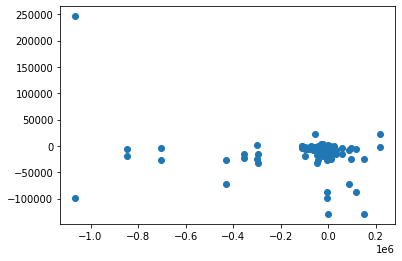

In [ ]:
# make scatter plot of the coefficients
# change aesthetics so the dots are not a single blob
plt.scatter(df["beta_conv"], df["beta_org"])



In [ ]:
# which regions have upward sloping demand curve for organic (as price increases, so did demand)?
# use code to show these rows of df

df.sort_values('beta_conv', ascending = False).head()



,region,beta_conv,beta_org
50,Midsouth,217126.30069,-2128.434417
51,Midsouth,217126.30069,21814.337090
58,Northeast,152594.72848,-24363.709569
59,Northeast,152594.72848,-129186.372092
30,GreatLakes,118822.92594,-5307.265152


In [ ]:
# which regions have upward sloping demand curve for conventional (as price increases, so did demand)?
# use code to show these rows of df

df.sort_values('beta_org', ascending = False).head()

,region,beta_conv,beta_org
104,West,-1.063483e+06,246283.396284
52,Nashville,-5.716375e+04,21814.337090
51,Midsouth,2.171263e+05,21814.337090
18,CincinnatiDayton,-3.001482e+04,2780.475253
17,Chicago,-2.209711e+04,2780.475253


Why might the relationship between price and demand be upward sloping instead of the expected downward sloping demand curve theorized in economics? i.e. the law of demand, when price increases, demand decreases. 

**Your answer here**

Yeah, thats right. When price increases demand decreases. Its happening the same in current analysis. But there is a co-relation of increase with increase it happens only some times. Normally, in emergency conditions. Emergency conditions make the sitution verse. Demand increases and price increases. 